<a href="https://colab.research.google.com/github/ramanakshay/Optimal-Transport/blob/main/notebooks/emd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualising Optimal Transport Using EMD
1. 1D Probability Distributions
2. Optimal Transport as a Distance Measure
3. 2D Probability Distributions
3. Binary Grids
4. Discrete Point Clouds



##Optimal Transport: The Primal Problem

$$ \large OT_C(a,b) := \min_{P \in U(a,b)} \left \langle  C,P\right \rangle$$

where $ \left \langle  C,P\right \rangle $ is the element-wise dot product of $ C $ and $ P $ and $ U(a,b) $ is the set of all possible couplings between $a$ and $b$.

##Importing Libraries



In [ ]:
!pip install pot  # Pip Installs Packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
user = 'ramanakshay'
repo = 'Optimal-Transport'

url = f"git+https://github.com/{user}/{repo}.git"
!pip install --upgrade {url}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ramanakshay/Optimal-Transport.git to /tmp/pip-req-build-65555fga
  Running command git clone -q https://github.com/ramanakshay/Optimal-Transport.git /tmp/pip-req-build-65555fga


In [ ]:
import numpy as np # best of nd-array
import matplotlib.pyplot as plt # plotting

import ot  # ot
import ot.plot
from prettytable import PrettyTable

import time # measure time
from numpy import random

In [ ]:
from utils.plot import plot_matrix,plot_2d_map,plot_grid
from utils.dist import find_cost_matrix,find_cost_matrix_old

##1D Probability Distributions


###Gaussian (Normal) Distribution

$$ \large f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left (  \frac{x-\mu}{\sigma}\right )^2} $$

where $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.

In [ ]:
# 1D Guassian

n = 100 # number of bins

mu_a = 20
std_a = 5
a = ot.datasets.make_1D_gauss(n, mu_a, std_a)

mu_b = 60
std_b = 20
b = ot.datasets.make_1D_gauss(n, mu_b, std_b)

x = np.array([[i,] for i in range(n)]) # defining the space

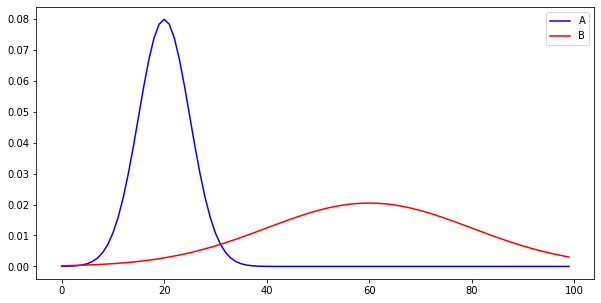

In [ ]:
#Plot distributions

plt.figure(figsize=(10, 5))
plt.plot(x, a, 'b', label='A')
plt.plot(x, b, 'r', label='B')
plt.legend()
plt.show()

###Cost Matrix

###Cost Matrix Calculator

The cost matrix defines the cost of moving mass from $x_a$ to $x_b$. The $L_n$ metric is used as the distance metric.

$$ \large C_{i,j} = \left [ \left ( \sum^d_{k = 1}\left |  x_i(k)- y_j(k)\right |^n  \right )^ \frac {1}{n} \right ]^{p}$$

where $x_i$ is the position of $a_i$ \
and $y_j$ is the position of $b_j$



<Figure size 504x504 with 0 Axes>

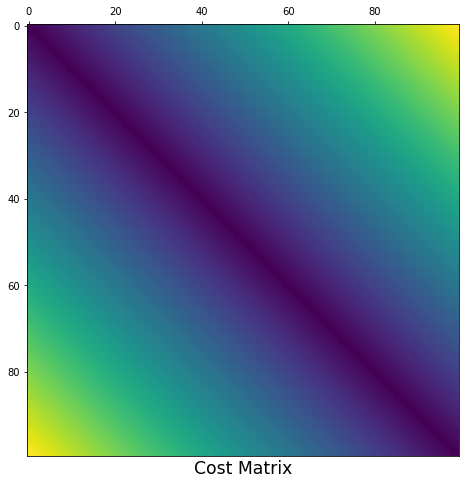

In [ ]:
# Cost Matrix and Defining Distance

p = 1 # set p-value
C = find_cost_matrix(x,x,p,dist = ('euclidean'))

plt.figure(3, figsize=(7, 7))
plot_matrix(C,x,x,title = 'Cost Matrix')
plt.show()

###Optimal Coupling


P = argmax optimal coupling / optimal transport plan

Time Taken: 0.008s


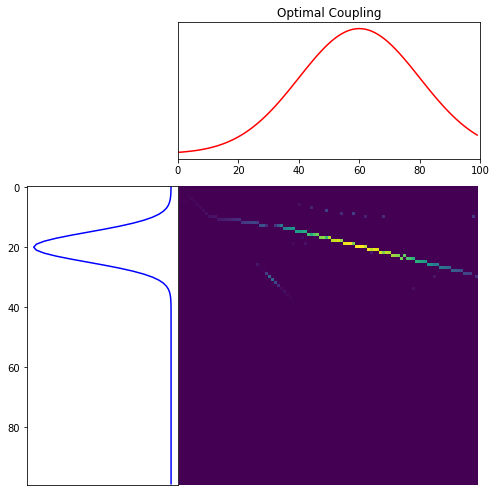

In [ ]:
start = time.time()
P = ot.emd(a, b, C)
time_emd = time.time() - start

plt.figure(3, figsize=(7, 7))
ot.plot.plot1D_mat(a, b, P, 'Optimal Coupling')

print('Time Taken: ' + str(round(time_emd,3))+ 's')

###p-Wasserstein Distance
The p-Wasserstein distance between a and b:

$$ W_p(a,b):= {OT_{C}(a,b)}^{\frac{1}{p}} $$




In [ ]:
W = pow(np.sum(C*P),1/p)
print('Wasserstein Distance:',W)

Wasserstein Distance: 38.92526964131279


###Comparison: Running Time for different values of N (N vs. t)

In [ ]:
## Running time for different values of n (n versus time)

table = PrettyTable()
table.field_names = ["N", "t (in seconds)"]

n = 15
while(n <= 15000):
  mu_a = 20
  std_a = 5
  a = ot.datasets.make_1D_gauss(n, mu_a, std_a)

  mu_b = 60
  std_b = 20
  b = ot.datasets.make_1D_gauss(n, mu_b, std_b)

  x = np.array([[i,] for i in range(n)]) # defining the space 
 
  _,t = quick_ot(a,b,x,x)

  table.add_row([n,round(t,3)])
  n *= 10

print(table)

+-------+----------------+
|   N   | t (in seconds) |
+-------+----------------+
|   15  |      0.0       |
|  150  |     0.006      |
|  1500 |     0.035      |
| 15000 |     2.587      |
+-------+----------------+


##Distance Measures

###Euclidean Distance

Euclidian distance between a and b:

$$ d_E(a,b) = \sqrt{\int_{\mathbb{R}}\vert a(x)-b(x)\vert^2dx} \approx \sqrt{\sum^n_{j=1}\vert a(x_j)-b(x_j)\vert^2} $$

In [ ]:
def euclidean(a,b):
  return pow(sum(pow(a-b,2)),0.5)


a = np.array([0.5,0.5])
b = np.array([0.5,0.5])
print('Euclidean Distance:',euclidean(a,b))

Euclidean Distance: 0.0


###KL-Divergence

KL-Divergence between a and b:
$$ d_{KL}(a || b) = \int^{\infty}_{-\infty}a(x)\log{\left ( \frac{a(x)}{b(x)} \right )}dx \approx \sum_{x \epsilon X}{a(x) \log{\left ( \frac{a(x)}{b(x)}  \right )}} $$

In [ ]:
def kl_divergence(a,b):
  return sum(a*np.log(a/b))

a = np.array([0.0,1.0])
b = np.array([0.5,0.5])
print('KL Divergence Distance:',kl_divergence(a,b))

KL Divergence Distance: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


###p-Wasserstein Distance

The p-Wasserstein distance between a and b:

$$ W_p(a,b) = {OT_{C}(a,b)}^{\frac{1}{p}} = \left (  \sum_{i,j}C_{ij}*P_{ij} \right )^{\frac{1}{p}}$$

In [ ]:
def wasserstein(p,C,P):
  return pow(np.sum(C*P),1/p)

a = np.array([1.0,0.0])
b = np.array([0.5,0.5])
p = 1
x = np.array([[0],[1]])
C = find_cost_matrix_old(x,x,p,dist = ('euclidean'))
P = ot.emd(a,b,C)
print('p-Wasserstein Distance:', wasserstein(p,C,P))

p-Wasserstein Distance: 0.5


###Comparison: Distance Measures

The value of the optimal cost (the distance between a and b) compare with KL divergence and Euclidian distance.


In [ ]:
def quick_ot(a,b,xa,xb):
  C = ot.dist(xa,xb)

  start = time.time()
  P = ot.emd(a, b, C)
  time_emd = time.time() - start

  return pow(np.sum(C*P),0.5),time_emd

In [ ]:
n = 100 # number of bins

mu_a = 20
std_a = 5
a = ot.datasets.make_1D_gauss(n, mu_a, std_a)

mu_b = 20
std_b = 10

x = np.array([[i,] for i in range(n)]) # defining the space

print("mean_a = 20, std_a = 5 (fixed)")

table = PrettyTable()
table.add_column("Distance Measures",["Euclidean","KL-Divergence","Wasserstein"])
while(mu_b != 100):
  b = ot.datasets.make_1D_gauss(n, mu_b, std_b)
  W,_ = quick_ot(a,b,x,x)
  d_e = euclidean(a,b)
  d_kl = kl_divergence(a,b)
  table.add_column("mean_b = "+str(mu_b)+", std_b = "+str(std_b),list(map(round,[d_e,d_kl,W],[3,3,3])))
  mu_b += 20

print(table)


mean_a = 20, std_a = 5 (fixed)
+-------------------+-------------------------+-------------------------+-------------------------+-------------------------+
| Distance Measures | mean_b = 20, std_b = 10 | mean_b = 40, std_b = 10 | mean_b = 60, std_b = 10 | mean_b = 80, std_b = 10 |
+-------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|     Euclidean     |          0.114          |          0.265          |          0.291          |          0.293          |
|   KL-Divergence   |          0.298          |          2.318          |          8.318          |          18.292         |
|    Wasserstein    |          4.542          |          20.622         |          40.312         |          59.553         |
+-------------------+-------------------------+-------------------------+-------------------------+-------------------------+


##2D Probability Distributions (Random)

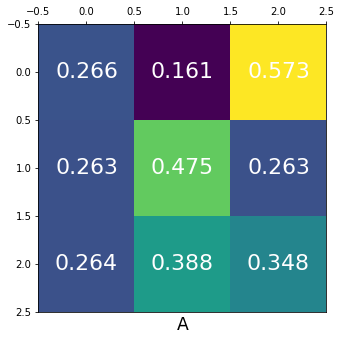

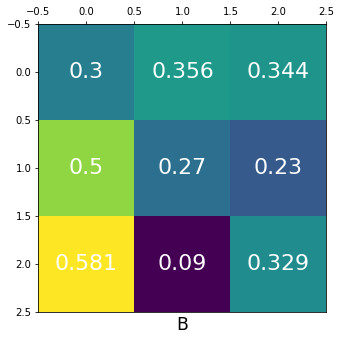

In [ ]:
n = 3 #side of square
a = random.randint(100,size = (n,n))
a = a/sum(a)
plot_matrix(a,size = [1.0,1.0], title = 'A')

b = random.randint(100,size = (n,n))
b = b/sum(b)
plot_matrix(b,size = [1.0,1.0], title = 'B')


x = []
for i in range(n):
  for j in range(n):
    x.append((i,j))
x = np.array(x) # defining the space

####Cost Matrix

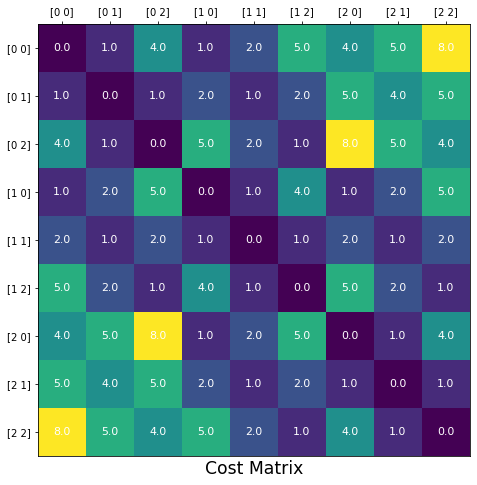

In [ ]:
# Cost Matrix
p = 2
C = find_cost_matrix_old(x,x,p,dist = ('euclidean'))

plot_matrix(C,x,x,title = 'Cost Matrix')

####Transformation Matrix

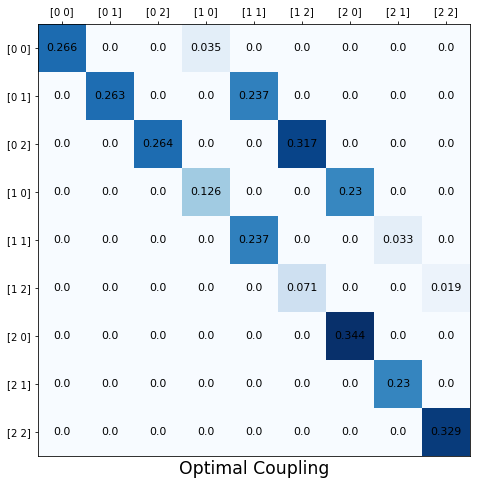

Time Taken: 0.001s


In [ ]:
a = a.flatten() #EMD takes vectors only
b = b.flatten()

start = time.time()
P = ot.emd(a, b, C)
time_emd = time.time() - start

plot_matrix(P,x,x,cmap = plt.cm.Blues,textcolor = 'black',title = 'Optimal Coupling')

print('Time Taken: ' + str(round(time_emd,3))+ 's')

####Wasserstein Distance

In [ ]:
W = pow(np.sum(C*P),1/p) 
print('Wasserstein Distance:',W)

Wasserstein Distance: 0.9330160807859345


##2D Binary Grid

In [ ]:
n = 4

grid_a = np.array(\
             [[1,0,1,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,0,0]]
             )

grid_b = np.array(\
             [[0,1,0,0],
              [0,0,0,0],
              [1,0,1,0],
              [0,0,0,1]]
             )


a = np.ones((np.sum(grid_a),)) / np.sum(grid_a) #uniform distribution
b = np.ones((np.sum(grid_b),)) / np.sum(grid_b)

In [ ]:
#Defining the space

xa = [] # only need points which have non-zero values
xb = []
x = [] # defining the entire space is unnecessary
for i in range(n):
  for j in range(n):
    if grid_a[i][j] == 1:
      xa.append([i,j])
    if grid_b[i][j] == 1:
      xb.append([i,j])
    x.append([i,j])

x = np.array(x)
xa = np.array(xa)
xb = np.array(xb)

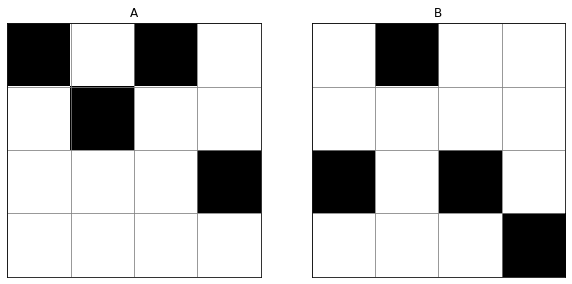

In [ ]:
#Plotting the Grids

plt.figure(figsize=(10, 5))

plt.subplot(121)
plot_grid(grid_a,n,title = "A")

plt.subplot(122)
plot_grid(grid_b,n,title = "B")

plt.show()

####Cost Matrix

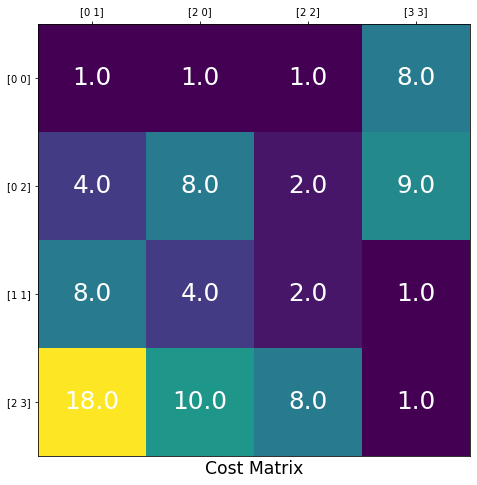

In [ ]:
# Cost Matrix
p = 2
C = find_cost_matrix_old(xa,xb,p,dist = ('euclidean'))

plot_matrix(C,xa,xb,title = 'Cost Matrix')

####Transformation

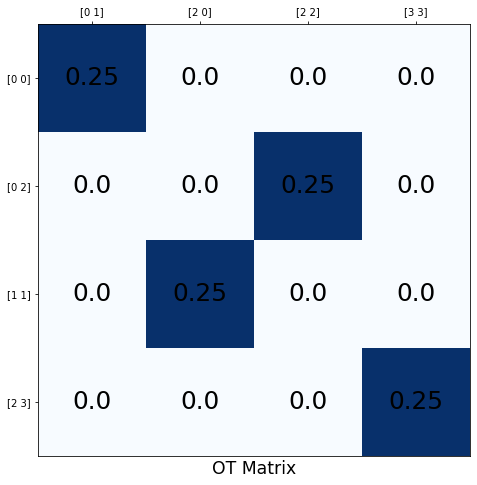

Time Taken: 0.003s


In [ ]:
start = time.time()
P = ot.emd(a, b, C)
time_emd = time.time() - start

plot_matrix(P,xa,xb,cmap = plt.cm.Blues,textcolor = 'black',title = 'OT Matrix')
print('Time Taken: ' + str(round(time_emd,3))+ 's')

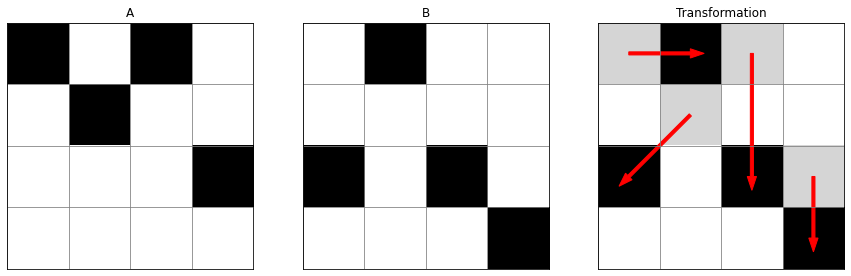

In [ ]:
#Transformation

plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_grid(grid_a,n,title = "A")

plt.subplot(132)
plot_grid(grid_b,n,title = "B")

plt.subplot(133)

grid_c = np.maximum(grid_a/6,grid_b)

for i in range(len(xa)):
  for j in range(len(xb)):
    if P[i][j] > 0:
      if (tuple(xa[i]) != tuple(xb[j])):
        plt.arrow(xa[i][1],xa[i][0],xb[j][1]-xa[i][1],xb[j][0]-xa[i][0],width = 0.05,color = "red")

plot_grid(grid_c,n,title = "Transformation")

plt.show()

####p-Wasserstein Distance

In [ ]:
W = pow(np.sum(C*P),1/p)
print('Wasserstein Distance:',W)

Wasserstein Distance: 1.4142135623730951


##2D Discrete Points

In [ ]:
n = 10  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([3, 3])
cov_t = np.array([[1, -.8], [-.8, 1]])

xa = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xb = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a = np.ones(n) / n
b = np.ones(n) / n

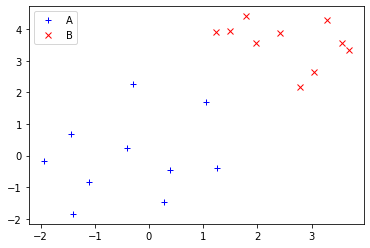

In [ ]:
plt.figure(1)
plt.plot(xa[:, 0], xa[:, 1], '+b', label='A')
plt.plot(xb[:, 0], xb[:, 1], 'xr', label='B')
plt.legend(loc=0)
plt.show()

####Cost Matrix

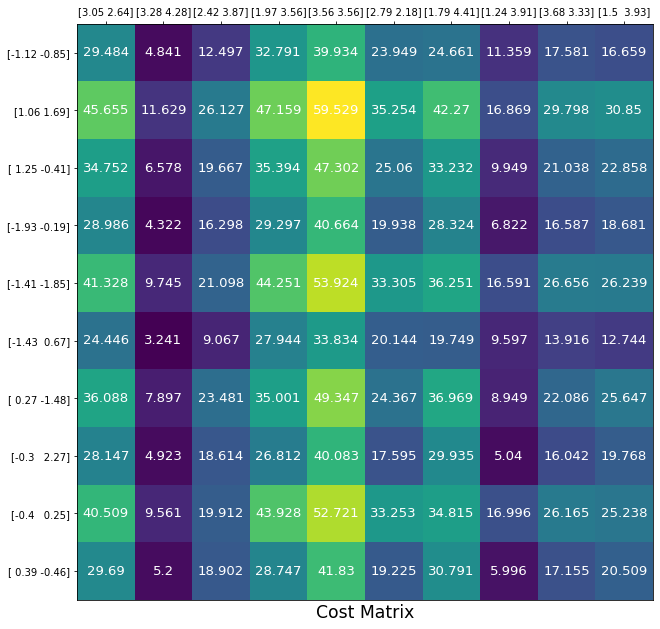

In [ ]:
p = 2
C = find_cost_matrix_old(xa,xb,p,dist = ('euclidean'))

plot_matrix(C,xa,xb,title = "Cost Matrix",size = (2.0,2.0))

####Transformation

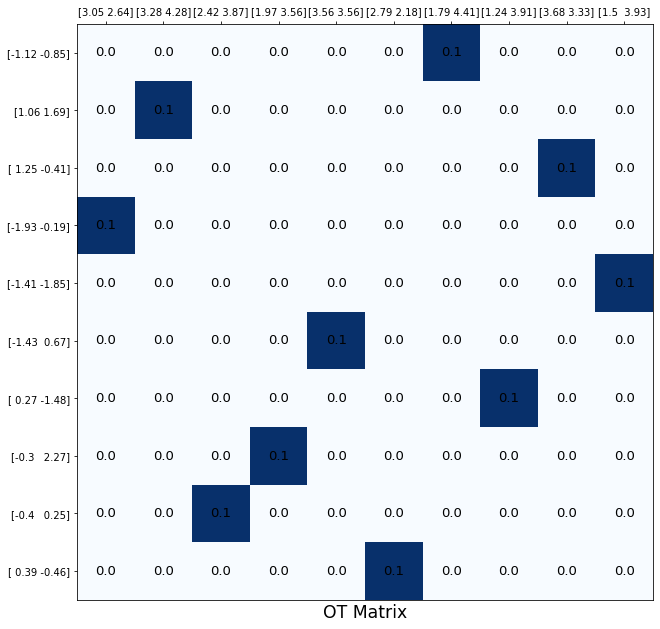

Time Taken: 0.001s


In [ ]:
start = time.time()
P = ot.emd(a, b, C)
time_emd = time.time() - start

plot_matrix(P,xa,xb,cmap = plt.cm.Blues,textcolor = 'black',title = 'OT Matrix',size = (2.0,2.0))
print('Time Taken: ' + str(round(time_emd,3))+ 's')

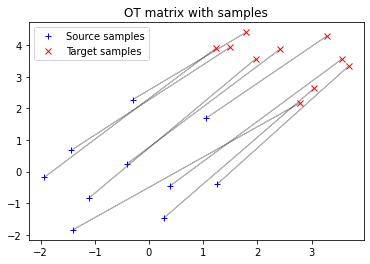

In [ ]:
plt.figure(4)

for i in range(len(xa)):
  for j in range(len(xb)):
    if P[i][j] > 0:
      if (tuple(xa[i]) != tuple(xb[j])):
        plt.arrow(xa[i][0],xa[i][1],xb[j][0]-xa[i][0],xb[j][1]-xa[i][1],width = 0.0001,color = "black", alpha = 0.3)

plt.plot(xa[:, 0], xa[:, 1], '+b', label='Source samples')
plt.plot(xb[:, 0], xb[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')
plt.show()

####p-Wasserstein Distance

In [ ]:
W = pow(np.sum(C*P),1/p)
print('Wasserstein Distance',W)

Wasserstein Distance 4.704093071686071
